<a href="https://colab.research.google.com/github/cristianmunoz1/Intro_ML_project/blob/main/03_Modelo_KNN_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN para regresión
Aplicamos un modelo no paramétrico KNN (para regresión) con el objetivo de predecir la cantidad de días que un animal puede pasar en un refugio.

Importes necesarios

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

Leemos los datos. Recuerda tener el archivo 'data.csv' cargado en tu entorno de trabajo.

In [ ]:
data = pd.read_csv('data.csv')

Partimos los datos en x e y

In [ ]:
x = data.drop(['TimeInShelterDays'], axis = 1)
y = data['TimeInShelterDays']
x = np.array(x)
y = np.array(y)

NameError: name 'data' is not defined

Definimos la función MAPE para evaluar el error

In [ ]:
def MAPE(Y_est,Y):
    """Mean Absolute Percentage Error para los problemas de regresión
    Y_est: numpy array con los valores estimados
    Y: numpy array con las etiquetas verdaderas
    retorna: mape
    """
    N = np.size(Y)
    epsilon = 1e-10
    mape = np.sum(abs((Y_est.reshape(N, 1) - Y.reshape(N, 1)) / (Y.reshape(N, 1) + epsilon))) / N
    return mape

Definimos la función que implementa una regresión con KNN pasándole los datos de train, el k y las muestras de test.

In [ ]:
def knn_regresion(k, X_train, Y_train, X_test):
    """ Función que implementa el modelo de K-Vecino mas cercanos
        para regresión

    k (int): valor de vecinos a usar
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación

    retorna: las estimaciones del modelo KNN para el conjunto X_test
             esta matriz debe tener un shape de [row/muestras de X_test]
             y las distancias de X_test respecto a X_train, estan matrix
             debe tener un shape de [rows de X_test, rows X_train]
             lo que es lo mismo [muestras de X_test, muestras de X_train]
    """

    distancias = distance.cdist(X_test, X_train, metric='euclidean')
    indices_vecinos = np.argsort(distancias, axis=1)[:, :k]
    Y_est = np.mean(Y_train[indices_vecinos], axis=1)

    return (Y_est, distancias)

In [ ]:
def make_knn_regression(ks, X, Y, splits):
    """Función que realiza los experimentos con knn usando
       una estrategia de validacion entrenamiento y pruebas

    ks: List[int/float] lista con los valores de k-vecinos a usar
    X: matriz de numpy conjunto con muestras y caracteristicas
    Y: vector de numpy con los valores a predecir
    splits: entero que representa el número de splits del kfold
    retorna: dataframe con los resultados, debe contener las siguientes columnas:
        - los k-vecinos, el error-mape medio de prueba, la desviacion estandar del error-mape
    """
    kf = KFold(n_splits=splits)
    resultados = pd.DataFrame()
    idx = 0

    # iteramos sobre la lista de k's
    for k in ks:
      mapes_test = []
      maes_test = []
      for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        Yest, _ = knn_regresion(k, X_train, y_train, X_test)
        maes_test.append(mean_absolute_error(y_test, Yest))
        mapes_test.append(MAPE(Yest, y_test))
        idx+=1
      resultados.loc[idx,'k-vecinos'] = k
      resultados.loc[idx,'MAPE de prueba'] = np.mean(mapes_test)
      resultados.loc[idx,'MAE de prueba'] = np.mean(maes_test)
      #asignamos la particion

    return resultados, Yest, y_test

In [ ]:
resultados, Yest, y_test = make_knn_regression([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 2000], x, y, 5)
resultados

,k-vecinos,MAPE de prueba,MAE de prueba
5,1.0,2.251714,29.764925
10,2.0,2.118237,25.861404
15,3.0,2.104385,24.720145
20,4.0,2.066305,24.001911
25,5.0,2.058142,23.779928
30,6.0,2.053050,23.614580
35,7.0,2.049924,23.409288
40,8.0,2.039883,23.274731
45,9.0,2.053962,23.124602
50,10.0,2.047598,23.026077


In [ ]:
def graficar_predicciones(y_real, y_predicho, cantidad_muestras):
    """
    Muestra una gráfica comparando los valores reales y predichos.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_real[:cantidad_muestras], label='Valor real', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_predicho[:cantidad_muestras], label='Valor predicho', marker='x', linestyle='--', alpha=0.7)
    media = np.mean(y_real[:cantidad_muestras])
    plt.axhline(y=media, color='gray', linestyle='--', alpha=0.7, label=f'Media: {media:.2f}')
    plt.title('Comparación entre valores reales y predichos')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

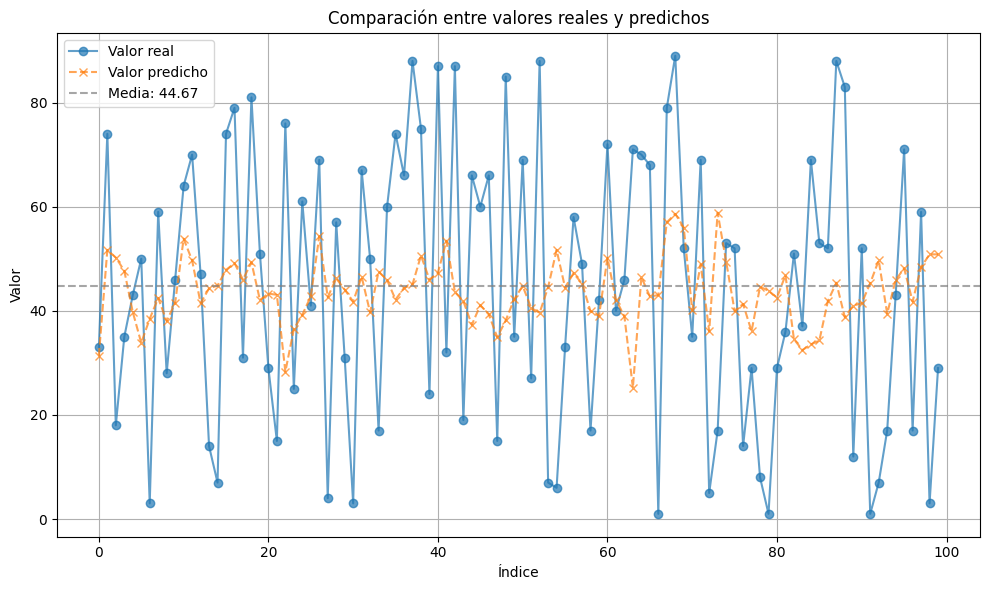

In [ ]:
graficar_predicciones(y_test, Yest, 100)